<a href="https://colab.research.google.com/github/ASWATHI-PK18/ev-market-segmentation/blob/main/evsegmentation_geographicdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import packages/libraries
!pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")

collecting datasets

In [ ]:
df=pd.read_csv("/content/sample_data/vehicle_type.csv")
df.head(4)

,Region,2W,3W,4W,Bus,Chargers
0,Uttar Pradesh,9852,42881,458,197,207
1,Maharastra,38558,893,1895,186,317
2,Karnataka,32844,568,589,57,172
3,Tamil Nadu,25642,396,426,0,256


In [ ]:
df.describe()

,2W,3W,4W,Bus,Chargers
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,8421.458333,3853.166667,334.041667,28.500000,106.791667
std,10942.261145,8850.690961,476.930628,63.771331,96.623869
min,187.000000,234.000000,12.000000,0.000000,10.000000
25%,848.000000,512.750000,34.750000,0.000000,25.000000
50%,2967.500000,931.000000,129.000000,0.000000,67.500000
75%,10697.750000,2659.250000,434.000000,5.500000,180.250000
max,38558.000000,42881.000000,1895.000000,197.000000,317.000000


In [ ]:
#df.info()
print("Total 2 wheelers in india:", df['2W'].sum())
print("Total 3 wheelers in india:", df['3W'].sum())
print("Total 4 wheelers in india:", df['4W'].sum())

Total 2 wheelers in india: 202115
Total 3 wheelers in india: 92476
Total 4 wheelers in india: 8017


In [ ]:
df.isnull().sum()


,0
Region,0
2W,0
3W,0
4W,0
Bus,0
Chargers,0


STATEWISE TWO WHEELERS ANALYSIS

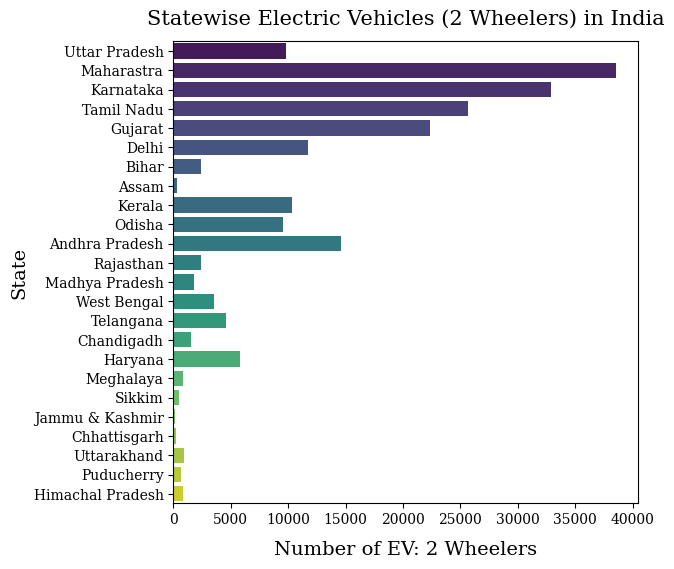

In [ ]:
# 2 wheelers data visualization from dataset 1
plt.figure(figsize=(6, 6))
sns.barplot(data=df, y=df['Region'].sort_values(ascending=True), x='2W', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 2 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (2 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

ANALYSIS OF 3 WHEELERS

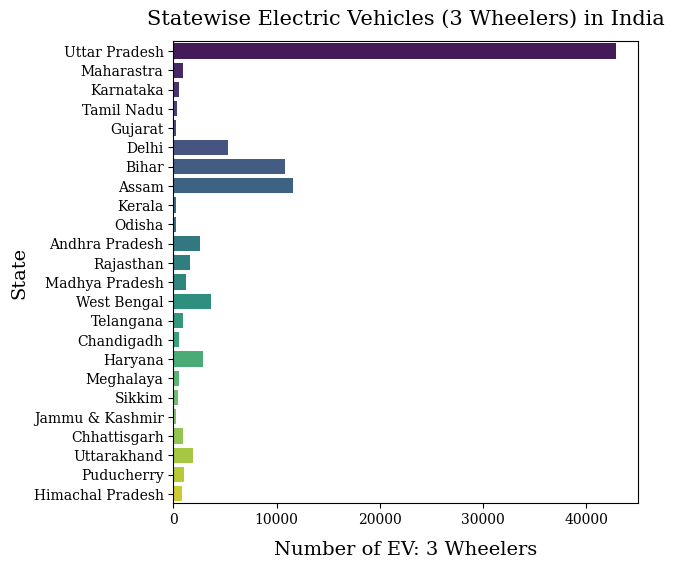

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df, y=df['Region'].sort_values(ascending=True), x='3W', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 3 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (3 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

**STATEWISE Analysis OF 4-wheeler EVs**

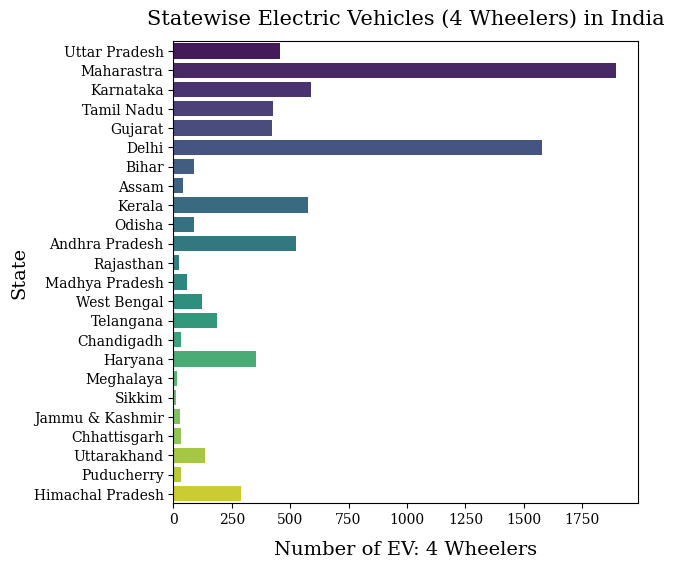

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df, y=df['Region'].sort_values(ascending=True), x='4W', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 4 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (4 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

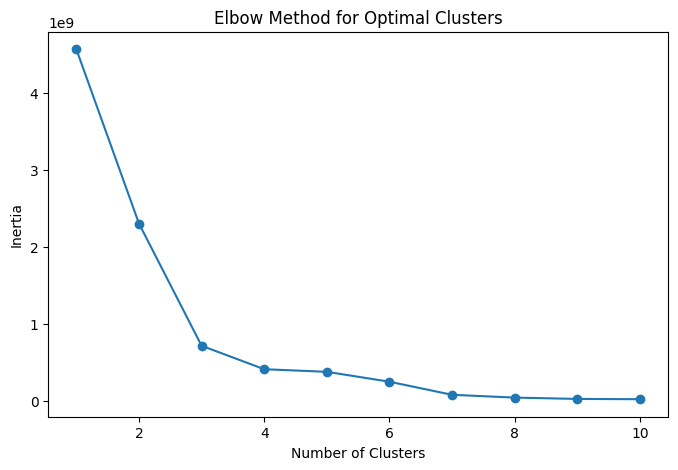

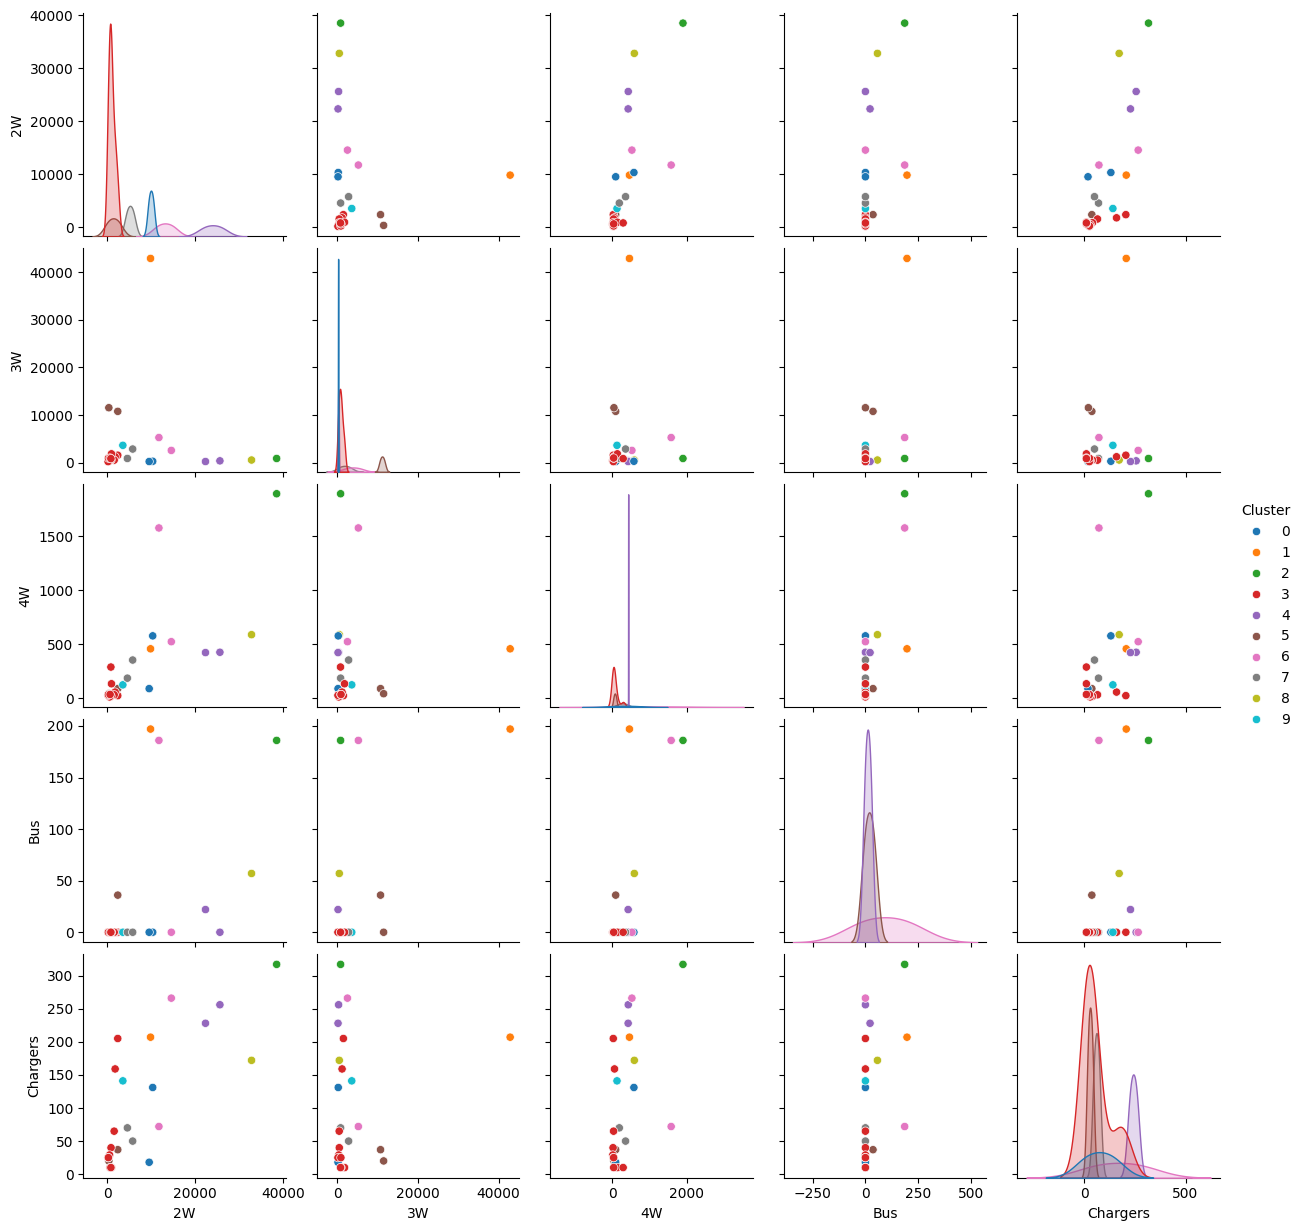

In [ ]:
data_for_clustering = df[['2W', '3W', '4W']]
# Calculate inertia for different cluster numbers
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto') # setting n_init to auto is recommended in recent versions of scikitlearn
    kmeans.fit(data_for_clustering)
    inertia.append(kmeans.inertia_)
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


df['Cluster'] = kmeans.labels_
sns.pairplot(df, hue='Cluster', palette='tab10')
plt.show()


### This **outcome** was a pair plot visualization that clearly showed the clustering of states based on their EV registration numbers for 2-wheelers, 3-wheelers, and 4-wheelers. The clusters were easily distinguishable by color, allowing for a straightforward interpretation of the results. This provided valuable insights into how different states were grouped based on their EV adoption patterns.italicized text